# Exploratory Data Analysis
## (Level - Beginner)

### Author - Kartikeya Consul


## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split   
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

## Collecting The Information about the Dataset

In [2]:
data = pd.read_csv("Exploratory_Data_Analysis.csv")

In [3]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
data.shape

(9994, 13)

In [7]:
data.duplicated().sum()

17

In [8]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [9]:
data['Postal Code'] = data['Postal Code'].astype('object')

In [10]:
data.drop_duplicates(subset=None,keep='first',inplace=True)

In [11]:
data.duplicated().sum()

0

## Visualizing the Data

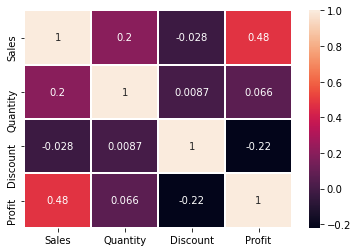

In [12]:
sns.heatmap(data.corr(), linecolor = 'white', linewidths = 1,annot = True) 

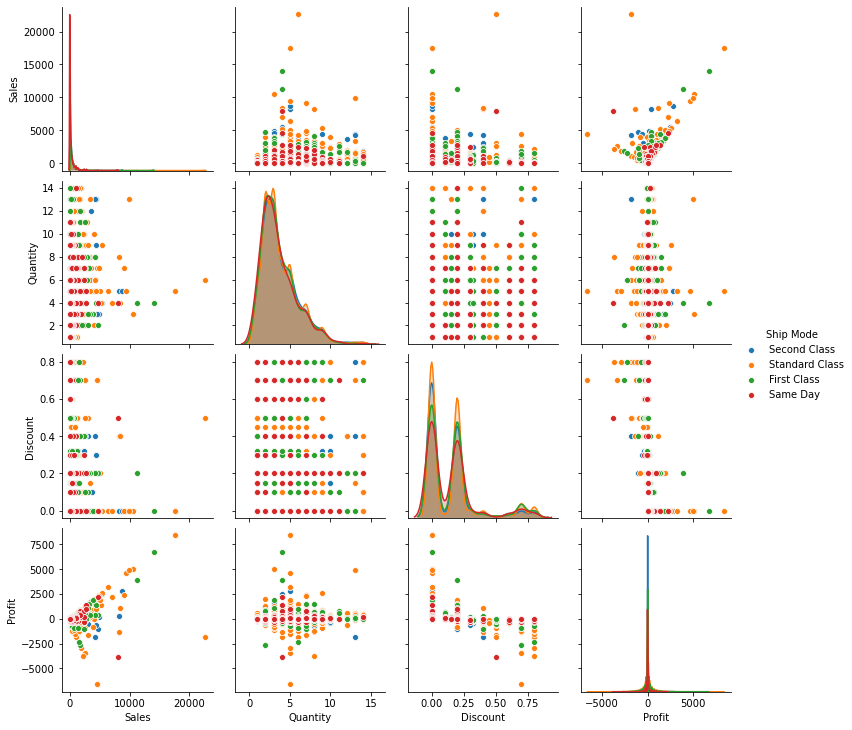

In [13]:
data=data.drop(['Postal Code'],axis=1)
sns.pairplot(data,hue="Ship Mode") 


In [14]:
data['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

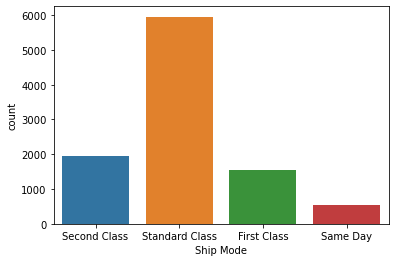

In [15]:
sns.countplot(x=data['Ship Mode'])

In [16]:
data['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

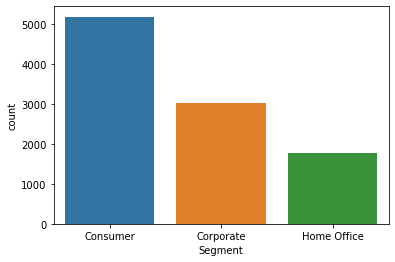

In [17]:
sns.countplot(x=data['Segment'])

In [18]:
data['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

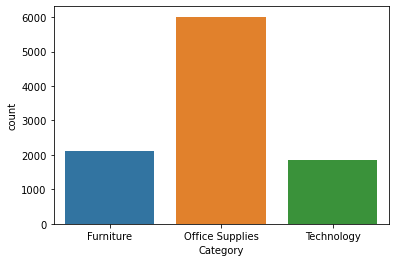

In [19]:
sns.countplot(x=data['Category'])

### Analysis - This represents that superstore has Office supplies more than Furniture and Technology

In [20]:
data['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

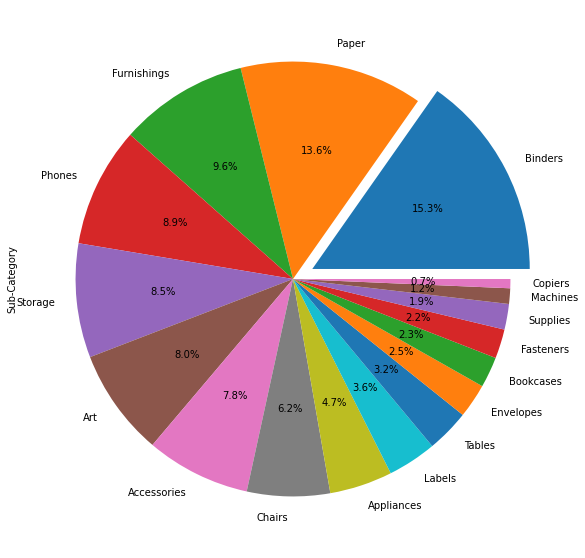

In [21]:
plt.figure(figsize=(12,10))
data['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%",explode = (0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0))
plt.show()


#### Analysis - This shows that the store has wide variety of Office Supplies especially in Binders and Paper department.

Text(0.5, 1.0, 'Sub-Category v/s Category')

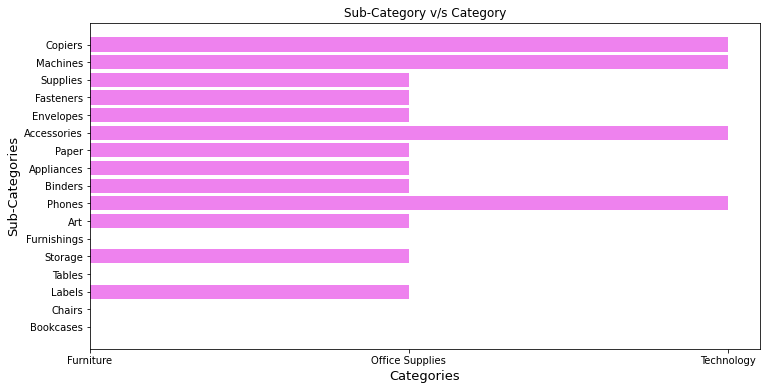

In [22]:
plt.figure(figsize=(12,6))
plt.barh(data['Sub-Category'],data['Category'],color='violet')
plt.xlabel("Categories",fontsize=13)
plt.ylabel("Sub-Categories",fontsize=13)
plt.title("Sub-Category v/s Category")

#### Analysis -  This graph shows which Category & Sub-Category to choose when they are looking to purchase a product

<ipython-input-23-63b0d7590aaa>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sale_profit_sum = data.groupby('Sub-Category')['Sales','Profit'].agg(['sum'])


Text(0, 0.5, 'Sales and Profit Sum')

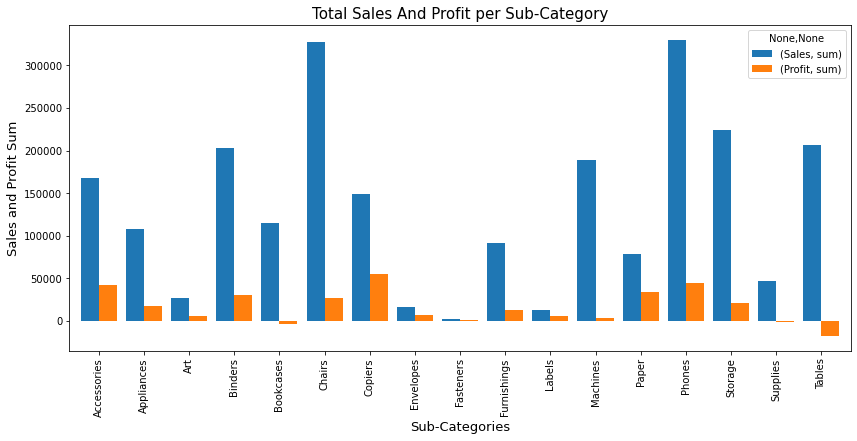

In [23]:
sale_profit_sum = data.groupby('Sub-Category')['Sales','Profit'].agg(['sum'])
sale_profit_sum.plot.bar(width = 0.8 ,figsize = (14,6))
plt.title("Total Sales And Profit per Sub-Category",fontsize = 15)
plt.xlabel("Sub-Categories",fontsize=13)
plt.ylabel("Sales and Profit Sum",fontsize=13)

### Analysis - Highest profit is earned in Copiers while Selling price for Chairs and Phones is extremely high compared to other products.

#### Another analysis is people dont prefer to buy Tables and Bookcases from Superstore. Hence these departments are in loss.

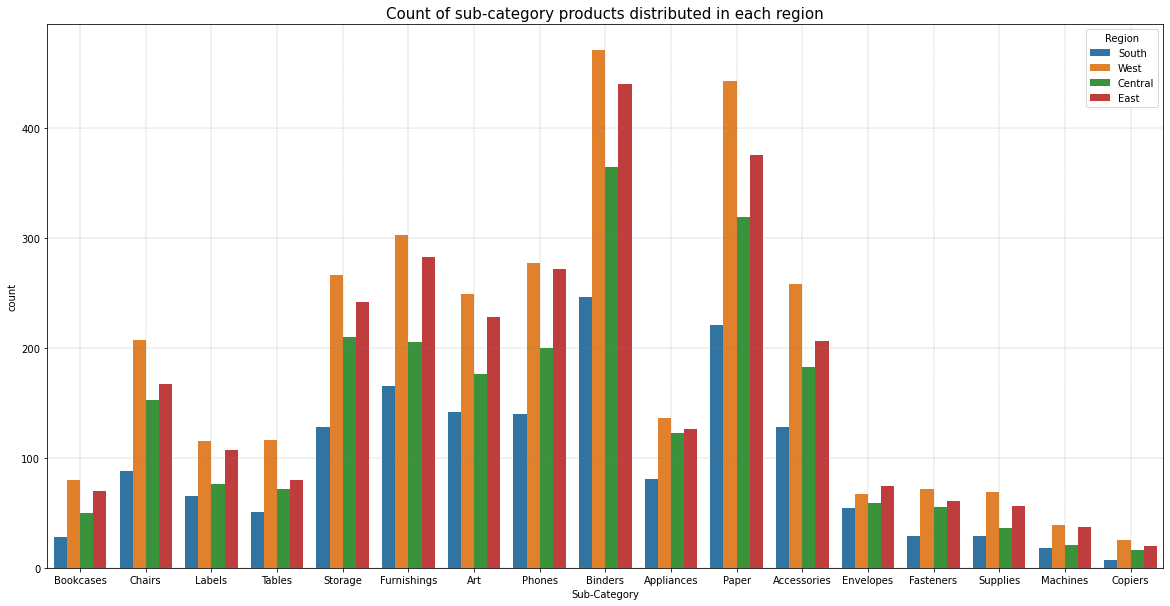

In [24]:
plt.figure(figsize=(20,10))
sns.countplot(x=data['Sub-Category'], hue=data['Region'])
plt.title("Count of sub-category products distributed in each region", fontsize=15)
plt.grid(color='gray', linestyle='--', linewidth=0.3)

### Analysis - People residing in Western and eastern part of US tend to order more from superstore.

## Finding the cost


In [25]:
# adding new column 'Cost' in the existing dataset
data['Cost'] = data['Sales'] - data['Profit']
print(data.head())

        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

  Region         Category Sub-Category     Sales  Quantity  Discount  \
0  South        Furniture    Bookcases  261.9600         2      0.00   
1  South        Furniture       Chairs  731.9400         3      0.00   
2   West  Office Supplies       Labels   14.6200         2      0.00   
3  South        Furniture       Tables  957.5775         5      0.45   
4  South  Office Supplies      Storage   22.3680         2      0.20   

     Profit       Cost  
0   41.9136   220.0464  
1  219.5820   512.3580  
2    6.8714     7.7486  
3 -383.031

## Cost Visualization

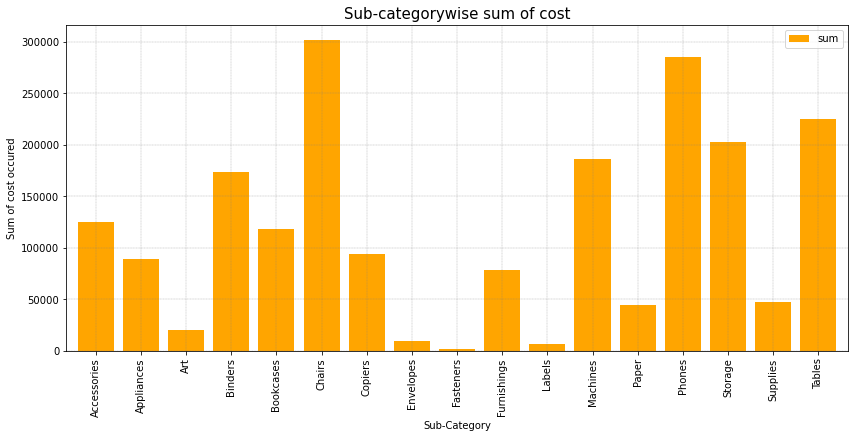

In [26]:
cost_occured = data.groupby('Sub-Category')['Cost'].agg(['sum'])
cost_occured.plot.bar(width=0.8,figsize=(14,6), color='orange')
plt.title('Sub-categorywise sum of cost',fontsize = 15)
plt.ylabel("Sum of cost occured")
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.show()

### Analysis - Retailers spending more cost on Chairs, Phones and Tables

## Visualization of total sales by sub- category

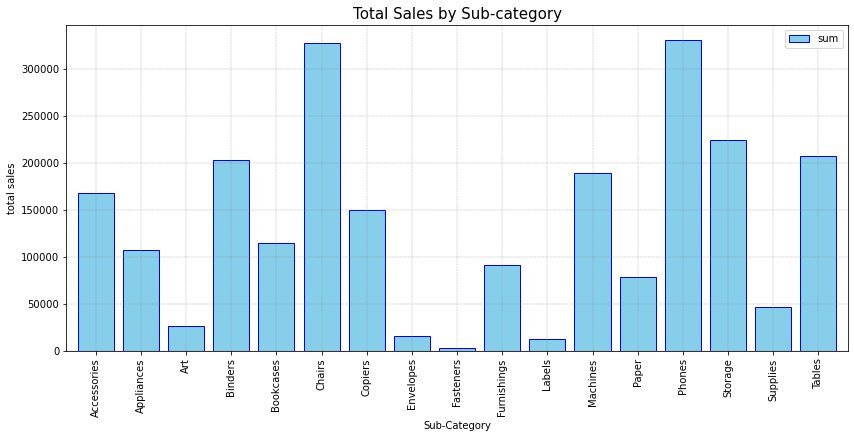

In [27]:
sub_cat_sales = data.groupby('Sub-Category')['Sales'].agg(['sum'])
sub_cat_sales.plot.bar(width=0.8,figsize=(14,6), color='skyblue', edgecolor='blue')
plt.title('Total Sales by Sub-category',fontsize = 15)
plt.ylabel('total sales')
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.show()

### Analysis - The graph represents the highest total sale in Phones and chair, means most of the people buy phones and chair from this store

## Finding Profit %

In [28]:
data['Profit %']=(data['Profit']/data['Cost'])*100
#Profit Percentage of first 5 product names
data.iloc[[0,1,2,3,4],[7,13]]

,Sub-Category,Profit %
0,Bookcases,19.047619
1,Chairs,42.857143
2,Labels,88.679245
3,Tables,-28.571429
4,Storage,12.676056


## Identifying which sub-category makes more profit¶

In [29]:
#Products with high Profit Percentage 
data.sort_values(['Profit %','Sub-Category'],ascending=False).groupby('Profit %').head(10)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
1696,Second Class,Home Office,United States,Bayonne,New Jersey,East,Technology,Phones,104.980,2,0.0,52.4900,52.4900,100.000000
2592,Second Class,Corporate,United States,Summerville,South Carolina,South,Technology,Phones,79.100,2,0.0,39.5500,39.5500,100.000000
6338,Standard Class,Corporate,United States,New York City,New York,East,Technology,Phones,87.800,4,0.0,43.9000,43.9000,100.000000
246,Second Class,Home Office,United States,Lakeville,Minnesota,Central,Office Supplies,Paper,47.880,6,0.0,23.9400,23.9400,100.000000
381,First Class,Corporate,United States,San Francisco,California,West,Office Supplies,Paper,50.960,7,0.0,25.4800,25.4800,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8916,Standard Class,Corporate,United States,Austin,Texas,Central,Office Supplies,Appliances,48.784,4,0.8,-131.7168,180.5008,-72.972973
8766,Standard Class,Corporate,United States,Fort Worth,Texas,Central,Office Supplies,Appliances,24.588,3,0.8,-67.6170,92.2050,-73.333333
9164,Standard Class,Consumer,United States,Chicago,Illinois,Central,Office Supplies,Appliances,143.128,2,0.8,-393.6020,536.7300,-73.333333
261,Standard Class,Corporate,United States,Pasadena,Texas,Central,Office Supplies,Appliances,1.624,2,0.8,-4.4660,6.0900,-73.333333


### Analysis - Retailers selling Phone,Binders,Papers have got 100% Profit in their Business.

## Count of Segmentation

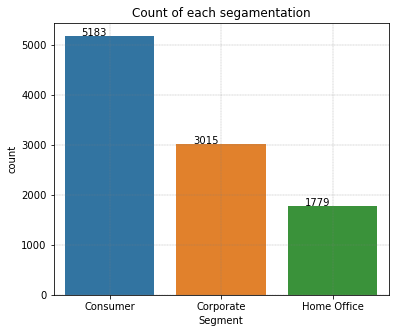

In [30]:
fig = plt.figure(figsize=(6,5))
axes = fig.add_subplot(111)
s = sns.countplot(data['Segment'])
for s in axes.patches:
    axes.annotate('{:.0f}'.format(s.get_height()), (s.get_x()+0.15, s.get_height()+1))
plt.title("Count of each segamentation")
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.show()

## Calculating Profit gained in each sub-category by segmentwise

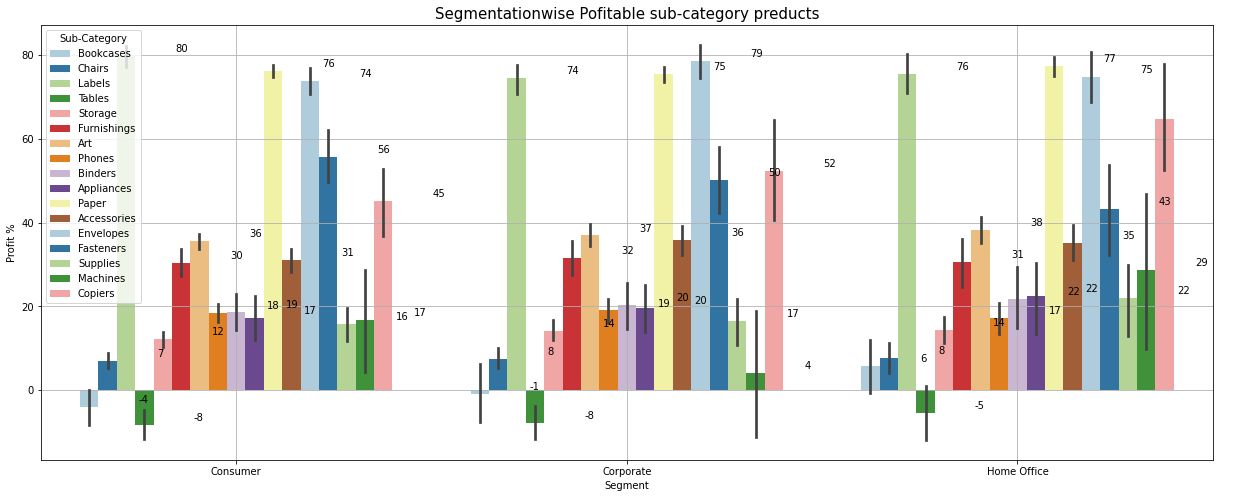

In [31]:
fig=plt.figure(figsize=(21,8))
ax = fig.add_subplot(111)
sns.barplot(data['Segment'],data['Profit %'],hue=data['Sub-Category'],palette='Paired')
for o in ax.patches:
    ax.annotate('{:.0f}'.format(o.get_height()), (o.get_x()+0.15, o.get_height()+1))
plt.title("Segmentationwise Pofitable sub-category preducts", fontsize=15)
plt.grid()
plt.show()

### Analysis - The above graph represents, Superstore makes more profit from Paper, Bookcase and supplies sub-categories in each segment.